In [1]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\omen\anaconda3\lib\site-packages (2.3.0)


In [2]:
!pip install --upgrade keras

Requirement already up-to-date: keras in c:\users\omen\anaconda3\lib\site-packages (2.4.3)


In [3]:
!pip install --upgrade opencv-python

Requirement already up-to-date: opencv-python in c:\users\omen\anaconda3\lib\site-packages (4.3.0.36)


Found 45500 images belonging to 26 classes.
Found 6500 images belonging to 26 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
800/800 [==============================] - 58s 73ms/step - loss: 3.2349 - accuracy: 0.0572 - val_loss: 3.1915 - val_accuracy: 0.1100
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


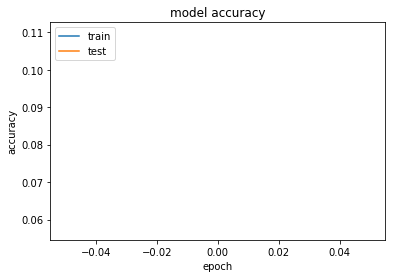

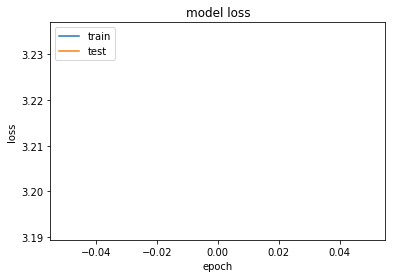

In [18]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers

# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolutio Layer 
classifier.add(Convolution2D(32, 3,  3, input_shape = (64, 64, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

#Adding 3rd Concolution Layer
#classifier.add(Convolution2D(64, 3,  3, activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size =(2,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(26, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'mydata/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'mydata/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=800,
        epochs=1,
        validation_data = test_set,
        validation_steps = 6500
      )

#Saving the model
import h5py
classifier.save('Trained_model.h5')

print(model.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
%matplotlib inline
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
%matplotlib inline
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

image_x, image_y = 64,64

from keras.models import load_model
classifier = load_model('Trained_model.h5')

def predictor():
       import numpy as np
       from keras.preprocessing import image
       test_image = image.load_img('1.png', target_size=(64, 64))
       test_image = image.img_to_array(test_image)
       test_image = np.expand_dims(test_image, axis = 0)
       result = classifier.predict(test_image)
       
       if result[0][0] == 1:
              return 'A'
       elif result[0][1] == 1:
              return 'B'
       elif result[0][2] == 1:
              return 'C'
       elif result[0][3] == 1:
              return 'D'
       elif result[0][4] == 1:
              return 'E'
       elif result[0][5] == 1:
              return 'F'
       elif result[0][6] == 1:
              return 'G'
       elif result[0][7] == 1:
              return 'H'
       elif result[0][8] == 1:
              return 'I'
       elif result[0][9] == 1:
              return 'J'
       elif result[0][10] == 1:
              return 'K'
       elif result[0][11] == 1:
              return 'L'
       elif result[0][12] == 1:
              return 'M'
       elif result[0][13] == 1:
              return 'N'
       elif result[0][14] == 1:
              return 'O'
       elif result[0][15] == 1:
              return 'P'
       elif result[0][16] == 1:
              return 'Q'
       elif result[0][17] == 1:
              return 'R'
       elif result[0][18] == 1:
              return 'S'
       elif result[0][19] == 1:
              return 'T'
       elif result[0][20] == 1:
              return 'U'
       elif result[0][21] == 1:
              return 'V'
       elif result[0][22] == 1:
              return 'W'
       elif result[0][23] == 1:
              return 'X'
       elif result[0][24] == 1:
              return 'Y'
       elif result[0][25] == 1:
              return 'Z'
       

       

cam = cv2.VideoCapture(0)

cv2.namedWindow("Trackbars")

cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)

cv2.namedWindow("test")

img_counter = 0

img_text = ''
while True:
    ret, frame = cam.read()
    frame = cv2.flip(frame,1)
    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")


    img = cv2.rectangle(frame, (425,100),(625,300), (0,255,0), thickness=2, lineType=8, shift=0)

    lower_blue = np.array([l_h, l_s, l_v])
    upper_blue = np.array([u_h, u_s, u_v])
    imcrop = img[102:298, 427:623]
    hsv = cv2.cvtColor(imcrop, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    cv2.putText(frame, img_text, (30, 400), cv2.FONT_HERSHEY_TRIPLEX, 1.5, (0, 255, 0))
    cv2.imshow("test", frame)
    cv2.imshow("mask", mask)
    
    #if cv2.waitKey(1) == ord('c'):
        
    img_name = "1.png"
    save_img = cv2.resize(mask, (image_x, image_y))
    cv2.imwrite(img_name, save_img)
    print("{} written!".format(img_name))
    img_text = predictor()
        

    if cv2.waitKey(1) == 27:
        break


cam.release()
cv2.destroyAllWindows()
